# Numerical solution of intermediate spacer loss scenario
This Notebook generates Fig. 4C.

In [1]:
using LinearAlgebra, DifferentialEquations
using Plots; gr() # plotting backend;

In [2]:
function acquisitionloss!(du,u,p,t)
    mul!(du,p,u) # non-allocating matrix multiplication
end

acquisitionloss! (generic function with 1 method)

In [3]:
# manifold projection callback for probability conservation
function g(resid,u,p,t)
    resid[1] = sum(u)-1
    resid[2:N] .= 0
end

g (generic function with 1 method)

## System size and initialization
repertoire size = [0,...,N-1]

In [4]:
T = 1000.0
tspan = (0.0,T)
N = 100

u0 = [0.0 for i in 1:N]
u0[1] = 1.0 # the population starts out having zero spacers;

## $n \rightarrow n'$ at constant rate $d$, where $n'<n$ uniformly

In [5]:
b = 15.
d = 1.

A = Array(Tridiagonal([b for i in 1:N-1],[-(b+d) for i in 1:N],[0.0 for i in 1:N-1]))
A[1,1] = -b
for i in 2:N
    A[1:i-1,i] .= d/(i-1)
end

prob5 = ODEProblem(acquisitionloss!,u0,tspan,A);

## Numerically integrate ODEs

In [6]:
cb = ManifoldProjection(g)
sol5 = solve(prob5,callback=cb)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 2885-element Vector{Float64}:
    0.0
    6.660003336655849e-5
    6.660003336655849e-5
    0.0007326003670321434
    0.0007326003670321434
    0.003603896115618199
    0.003603896115618199
    0.008206084065328849
    0.008206084065328849
    0.013749210461468358
    0.013749210461468358
    0.021092394608960265
    0.021092394608960265
    ⋮
  996.7558682234061
  996.7558682234061
  997.4778581978335
  997.4778581978335
  998.1998481435717
  998.1998481435717
  998.9218380606205
  998.9218380606205
  999.643828044611
  999.643828044611
 1000.0
 1000.0
u: 2885-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.9990015315726888, 0.000997969780657806, 4.984806187556529e-7, 1.659932073985921e-10, 4.145668692001692e-14, 8.282754276861381e-18, 1.4236437908660313e-2

## Plot along with analytical prediction

In [7]:
p0 = d/(b+d)

0.0625

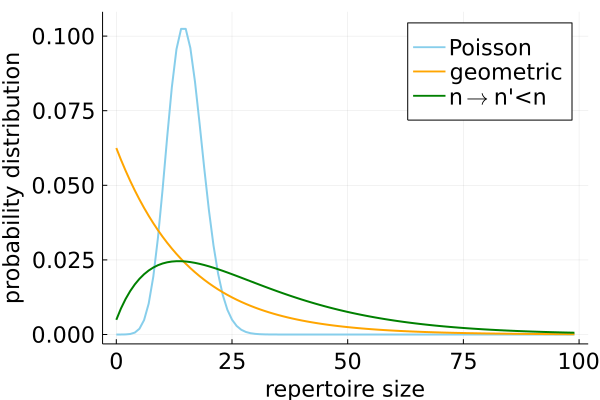

In [8]:
fs = 15

p1 = plot(0:N-1,n->1/factorial(big(n))*(b/d)^n*exp(-b/d),
      lw=2,
      color="skyblue",
      label="Poisson") # Poisson distribution
plot!(0:N-1,n->(1-p0)^n*p0,
      lw=2,
      color="orange",
      label="geometric") # geometric distribution
plot!(0:N-1,sol5(T),
      lw=2,
      color="green",
      label="n\$\\rightarrow\$n'<n")

plot!(xlabel="repertoire size", ylabel="probability distribution", ylim = [0,0.105],xtickfontsize=fs,ytickfontsize=fs,xguidefontsize=fs,yguidefontsize=fs,legendfontsize=fs)